#### Paso 1 Carga los datos:
Carga la tabla consolidada de datos que se realizó en el avance de proyecto con empresa aliada anterior (en Módulo 7: Pandas: Dataframes, lectura y exploración de archivos)  así como también los datos de alguna otra tabla que necesites usar para el EDA o la visualización y no fueron posibles consolidar en un solo archivo.
#### Paso 2 Identificar las variables clave para el análisis:
Determina qué variables son más relevantes para responder a las preguntas de negocio.

In [7]:
import pandas as pd

# Especificar los tipos de datos de las columnas
dtype = {
    'WEEK': 'str',
    'ITEM_CODE': 'str',
    'TOTAL_UNIT_SALES': 'float',
    'TOTAL_VALUE_SALES': 'float',
    'TOTAL_UNIT_AVG_WEEKLY_SALES': 'float',
    'REGION': 'str',
    'MANUFACTURER': 'str',
    'BRAND': 'str',
    'ITEM': 'str',
    'ITEM_DESCRIPTION': 'str',
    'CATEGORY_x': 'int',
    'FORMAT': 'str',
    'ATTR1_x': 'str',
    'ATTR2_x': 'str',
    'ATTR3_x': 'str',
    'ID_CATEGORY': 'int',
    'CATEGORY_y': 'str',
    'CATEGORY': 'str',
    'ATTR1_y': 'str',
    'ATTR2_y': 'str',
    'ATTR3_y': 'str',
    'SEGMENT': 'str',
    'YEAR': 'int',
    'MONTH': 'int',
    'WEEK_NUMBER': 'int',
    'DATE': 'str',
    'TOTAL_SALES': 'float',
    'TOTAL_AVG_SALES': 'float',
    'REGION_STATES': 'str',
    'REGION_NAME': 'str'
}

# cargar tabla del ejercicio anterior
df_merged = pd.read_csv("df_merged.csv", dtype=dtype)

# Convertir la columna DATE a formato de fecha, manejando errores
df_merged['DATE'] = pd.to_datetime(df_merged['DATE'], errors='coerce')

# Rellenar valores NaT con una fecha predeterminada (por ejemplo, '01/01/2000')
df_merged['DATE'] = df_merged['DATE'].fillna(pd.to_datetime('01/01/2000', format='%d/%m/%Y'))

# Convertir la columna DATE al formato deseado '%d/%m/%Y'
df_merged['DATE'] = df_merged['DATE'].dt.strftime('%d/%m/%Y')

# Crear nuevas columnas calculadas
df_merged['TOTAL_SALES'] = df_merged['TOTAL_UNIT_SALES'] * df_merged['TOTAL_VALUE_SALES']
df_merged['TOTAL_AVG_SALES'] = df_merged['TOTAL_UNIT_AVG_WEEKLY_SALES'] * df_merged['TOTAL_VALUE_SALES']

print(df_merged.dtypes)

Unnamed: 0                       int64
WEEK                            object
ITEM_CODE                       object
TOTAL_UNIT_SALES               float64
TOTAL_VALUE_SALES              float64
TOTAL_UNIT_AVG_WEEKLY_SALES    float64
REGION                          object
MANUFACTURER                    object
BRAND                           object
ITEM                            object
ITEM_DESCRIPTION                object
CATEGORY_x                       int32
FORMAT                          object
ATTR1_x                         object
ATTR2_x                         object
ATTR3_x                         object
ID_CATEGORY                      int32
CATEGORY_y                      object
CATEGORY                        object
ATTR1_y                         object
ATTR2_y                         object
ATTR3_y                         object
SEGMENT                         object
YEAR                             int32
MONTH                            int32
WEEK_NUMBER              

#### Paso 3 Visualizar la distribución de ventas:
Crea gráficos de distribución (histogramas o boxplots) para visualizar la distribución de ventas por diferentes categorías. Esto ayudará a identificar patrones de ventas y posibles outliers.

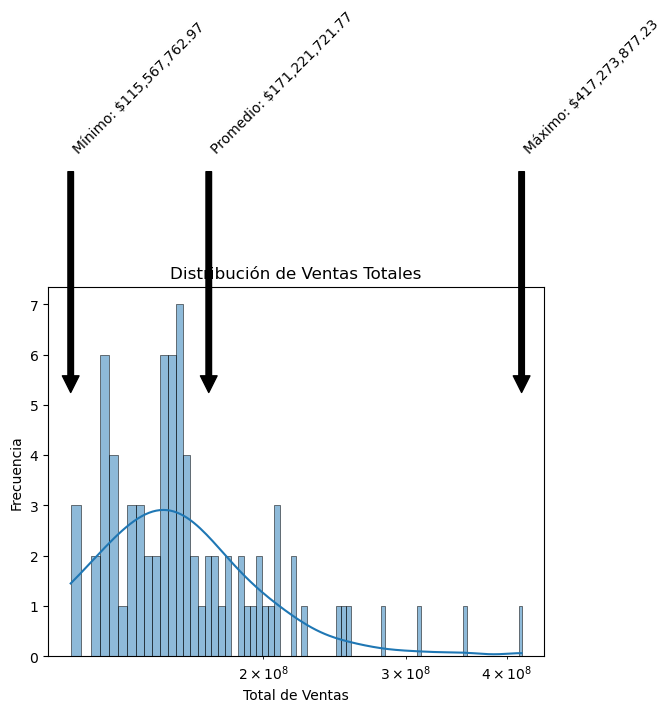

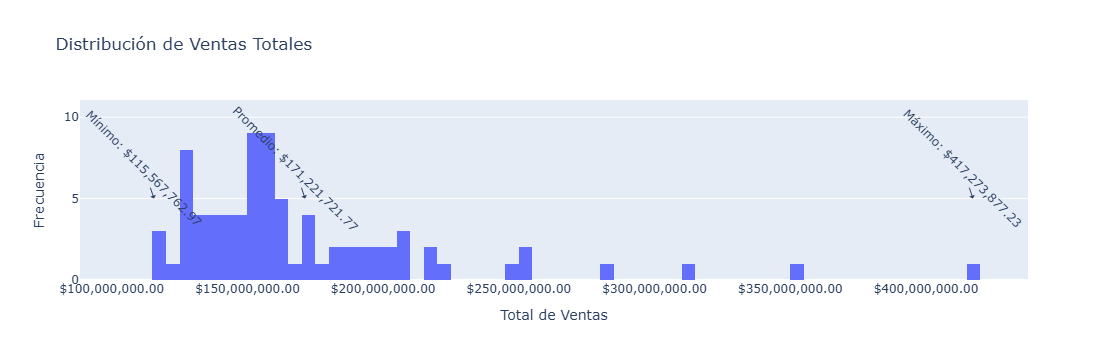

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar datos
df_grouped = df_merged.groupby('DATE')['TOTAL_SALES'].sum().reset_index()

# Convertir la columna 'TOTAL_SALES' a formato numérico para el histograma
df_grouped['TOTAL_SALES'] = df_grouped['TOTAL_SALES'].replace('[\\$,]', '', regex=True).astype(float)

# Histograma de ventas totales con menos bins y escala logarítmica en el eje x
sns.histplot(df_grouped['TOTAL_SALES'], bins=90, kde=True)
plt.title('Distribución de Ventas Totales')
plt.xlabel('Total de Ventas')
plt.ylabel('Frecuencia')
plt.xscale('log')
plt.xticks(rotation=90)

# Agregar anotaciones con etiquetas 
max_sales = df_grouped['TOTAL_SALES'].max()
min_sales = df_grouped['TOTAL_SALES'].min()
mean_sales = df_grouped['TOTAL_SALES'].mean()

plt.annotate(f'Máximo: ${max_sales:,.2f}', xy=(max_sales, 5), xytext=(max_sales, 10),
             arrowprops=dict(facecolor='black', shrink=0.05), rotation=45)
plt.annotate(f'Mínimo: ${min_sales:,.2f}', xy=(min_sales, 5), xytext=(min_sales, 10),
             arrowprops=dict(facecolor='black', shrink=0.05), rotation=45)
plt.annotate(f'Promedio: ${mean_sales:,.2f}', xy=(mean_sales, 5), xytext=(mean_sales, 10),
             arrowprops=dict(facecolor='black', shrink=0.05), rotation=45)

# Guardar el gráfico como imagen
plt.savefig('histograma_ventas_totales_con_insights.png')

# Mostrar Grafico
plt.show()

import plotly.express as px
import pandas as pd

# Convertir la columna 'TOTAL_SALES' a formato numérico para el histograma
df_grouped['TOTAL_SALES'] = df_grouped['TOTAL_SALES'].replace('[\\$,]', '', regex=True).astype(float)

# Crear un histograma interactivo con Plotly
fig = px.histogram(df_grouped, x='TOTAL_SALES', nbins=90, title='Distribución de Ventas Totales')

# Calcular insights
max_sales = df_grouped['TOTAL_SALES'].max()
min_sales = df_grouped['TOTAL_SALES'].min()
mean_sales = df_grouped['TOTAL_SALES'].mean()

# Agregar anotaciones con etiquetas
fig.add_annotation(
    x=max_sales, y=5,
    text=f'Máximo: ${max_sales:,.2f}',
    showarrow=True,
    arrowhead=1,
    textangle=45
)
fig.add_annotation(
    x=min_sales, y=5,
    text=f'Mínimo: ${min_sales:,.2f}',
    showarrow=True,
    arrowhead=1,
    textangle=45
)
fig.add_annotation(
    x=mean_sales, y=5,
    text=f'Promedio: ${mean_sales:,.2f}',
    showarrow=True,
    arrowhead=1,
    textangle=45
)

# Actualizar etiquetas y formato del eje x
fig.update_layout(
    xaxis_title='Total de Ventas',
    yaxis_title='Frecuencia',
    xaxis=dict(tickformat='$,.2f')
)

# Guardar el gráfico como imagen
fig.write_image('distribucion_ventas_totales_con_insights.png')

# Mostrar el gráfico interactivo
fig.show()


# Convertir la columna 'TOTAL_SALES' a formato numérico para el boxplot
df_merged['TOTAL_SALES'] = df_merged['TOTAL_SALES'].replace('[\\$,]', '', regex=True).astype(float)

# Boxplot de ventas por categoría con escala logarítmica en el eje y
sns.boxplot(x='SEGMENT', y='TOTAL_SALES', data=df_merged)
plt.title('Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Total de Ventas')
plt.yscale('log')
plt.xticks(rotation=65)

# Guardar el gráfico como imagen
plt.savefig('boxplot_ventas_totales.png')
plt.show()


# Convertir la columna 'TOTAL_SALES' a formato numérico para el gráfico violin
df_merged['TOTAL_SALES'] = df_merged['TOTAL_SALES'].replace('[\\$,]', '', regex=True).astype(float)

# Gráfico violin de ventas por categoría con escala logarítmica en el eje y
sns.violinplot(x='SEGMENT', y='TOTAL_SALES', data=df_merged)
plt.title('Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Total de Ventas')
plt.yscale('log')
plt.xticks(rotation=65)

# Guardar el gráfico como imagen
plt.savefig('violinplot_ventas_totales.png')

plt.show()

#### Paso 4 Analizar la tendencia de ventas en el tiempo:
Genera gráficos de líneas que muestren las tendencias de ventas a lo largo del tiempo. Filtra las ventas por diferentes productos, regiones o segmentos para analizar cómo han cambiado las ventas a lo largo del tiempo.

Explorar la relación entre diferentes variables:

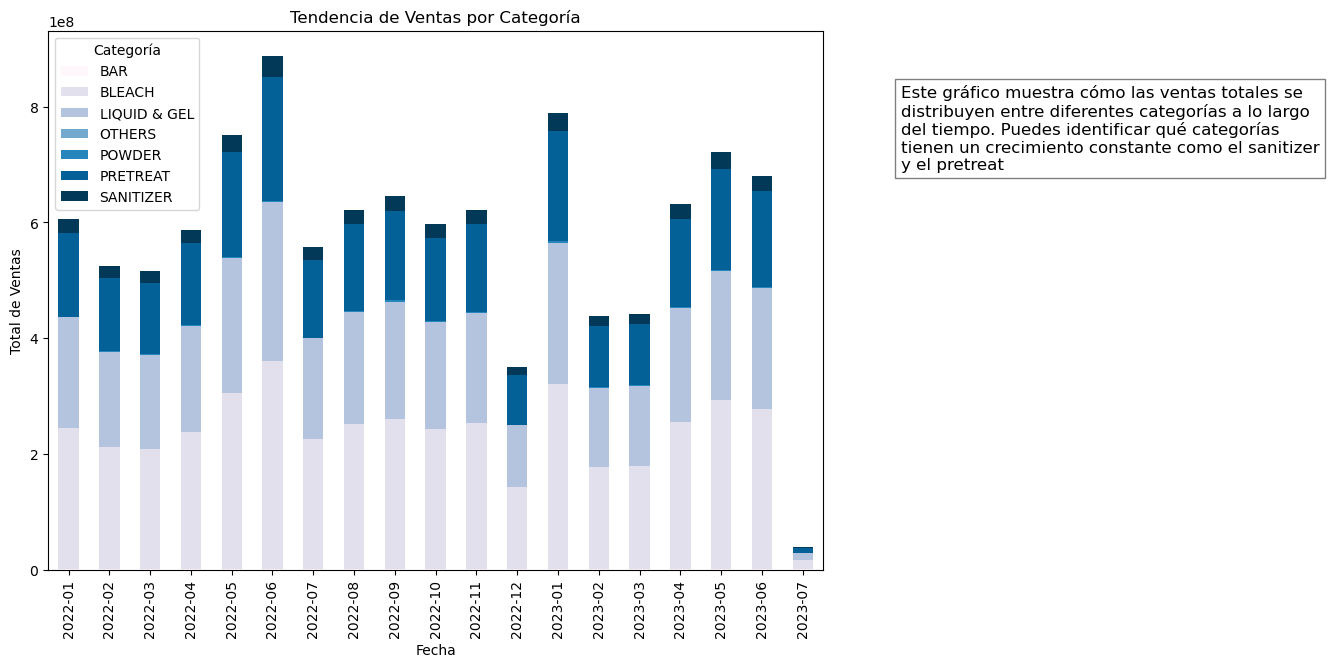

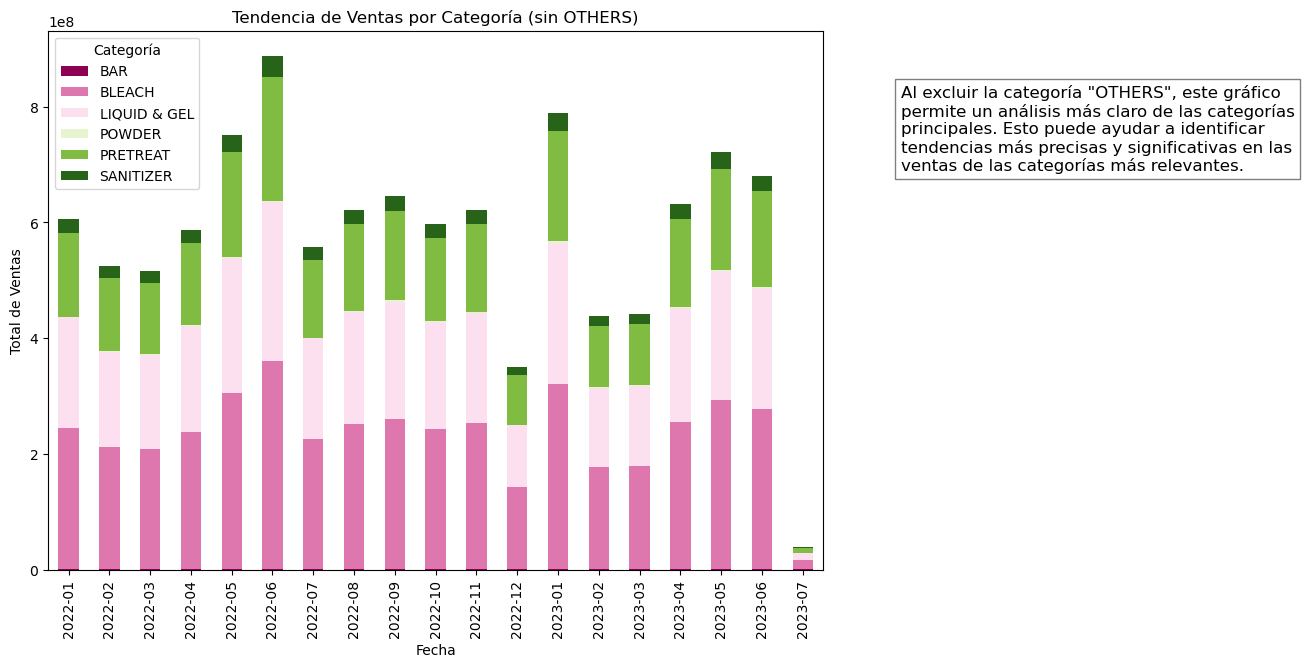

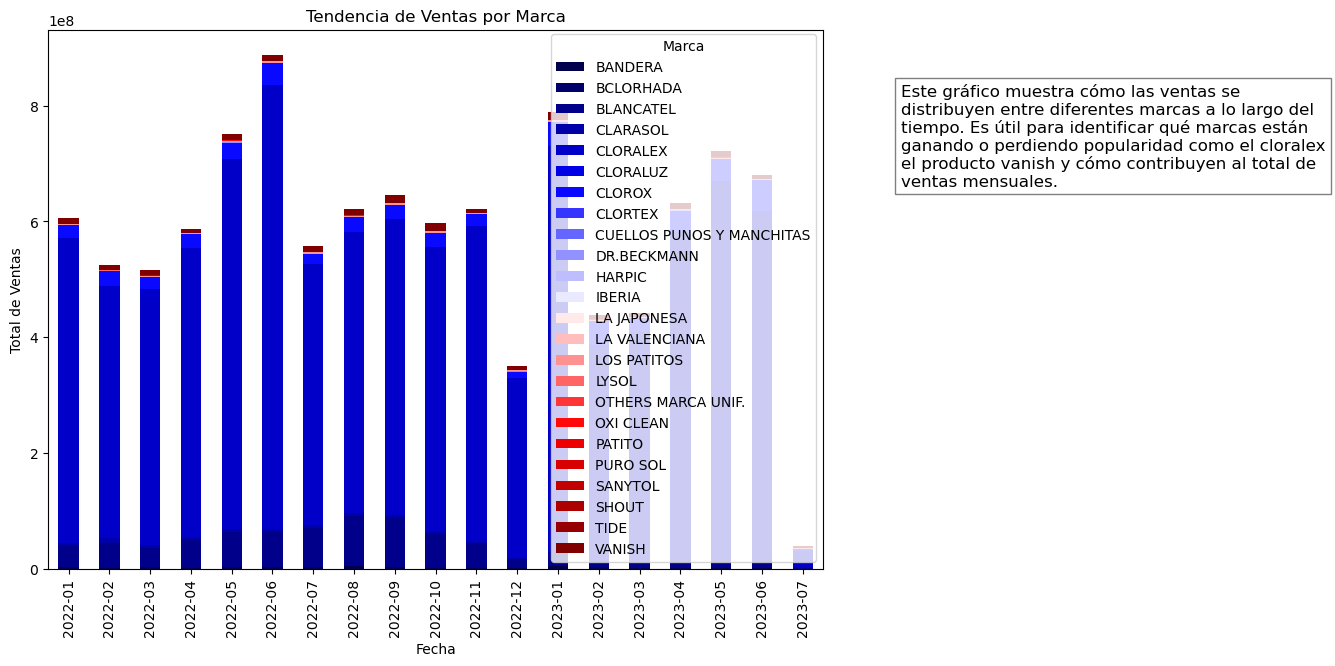

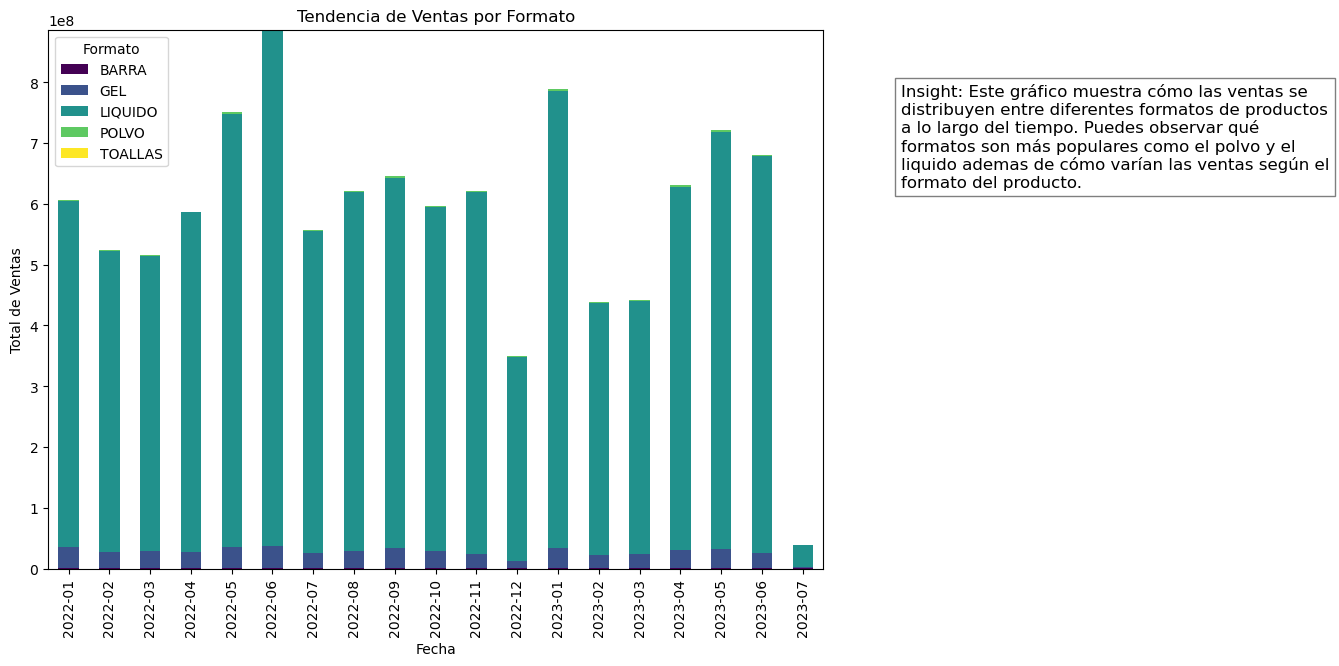

In [55]:
import matplotlib.pyplot as plt
import textwrap

# Función para dividir el texto en líneas más cortas
def wrap_text(text, width):
    return "\n".join(textwrap.wrap(text, width))

# Ordenar los datos por fecha
df_merged['DATE'] = pd.to_datetime(df_merged['DATE'], format='%d/%m/%Y')
df_merged = df_merged.sort_values(by='DATE')

# Agrupar las fechas por meses
df_merged['MONTH'] = df_merged['DATE'].dt.to_period('M')

# Tendencia de ventas por categoría
df_category = df_merged.pivot_table(values='TOTAL_SALES', index='MONTH', columns='SEGMENT', aggfunc='sum')
ax = df_category.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='PuBu')
plt.title('Tendencia de Ventas por Categoría')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.legend(title='Categoría')
insight_text = wrap_text('Este gráfico muestra cómo las ventas totales se distribuyen entre diferentes categorías a lo largo del tiempo. Puedes identificar qué categorías tienen un crecimiento constante como el sanitizer y el pretreat', 50)  # Reducir el width a 50
plt.text(1.1, 0.9, insight_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

# Filtrar los valores "OTHERS" de la columna "SEGMENT"
df_filtered = df_merged[df_merged['SEGMENT'] != 'OTHERS']

# Tendencia de ventas por categoría (sin OTHERS)
df_filtered_category = df_filtered.pivot_table(values='TOTAL_SALES', index='MONTH', columns='SEGMENT', aggfunc='sum')
ax = df_filtered_category.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='PiYG')
plt.title('Tendencia de Ventas por Categoría (sin OTHERS)')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.legend(title='Categoría')
insight_text = wrap_text('Al excluir la categoría "OTHERS", este gráfico permite un análisis más claro de las categorías principales. Esto puede ayudar a identificar tendencias más precisas y significativas en las ventas de las categorías más relevantes.', 50)  # Reducir el width a 50
plt.text(1.1, 0.9, insight_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

# Tendencia de ventas por marca
df_brand = df_merged.pivot_table(values='TOTAL_SALES', index='MONTH', columns='BRAND', aggfunc='sum')
ax = df_brand.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='seismic')
plt.title('Tendencia de Ventas por Marca')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.legend(title='Marca')
insight_text = wrap_text('Este gráfico muestra cómo las ventas se distribuyen entre diferentes marcas a lo largo del tiempo. Es útil para identificar qué marcas están ganando o perdiendo popularidad como el cloralex el producto vanish y cómo contribuyen al total de ventas mensuales.', 50)  # Reducir el width a 50
plt.text(1.1, 0.9, insight_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

# Tendencia de ventas por formato
df_format = df_merged.pivot_table(values='TOTAL_SALES', index='MONTH', columns='FORMAT', aggfunc='sum')
ax = df_format.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.title('Tendencia de Ventas por Formato')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.legend(title='Formato')
insight_text = wrap_text('Insight: Este gráfico muestra cómo las ventas se distribuyen entre diferentes formatos de productos a lo largo del tiempo. Puedes observar qué formatos son más populares como el polvo y el liquido ademas de cómo varían las ventas según el formato del producto.', 50)  # Reducir el width a 50
plt.text(1.1, 0.9, insight_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

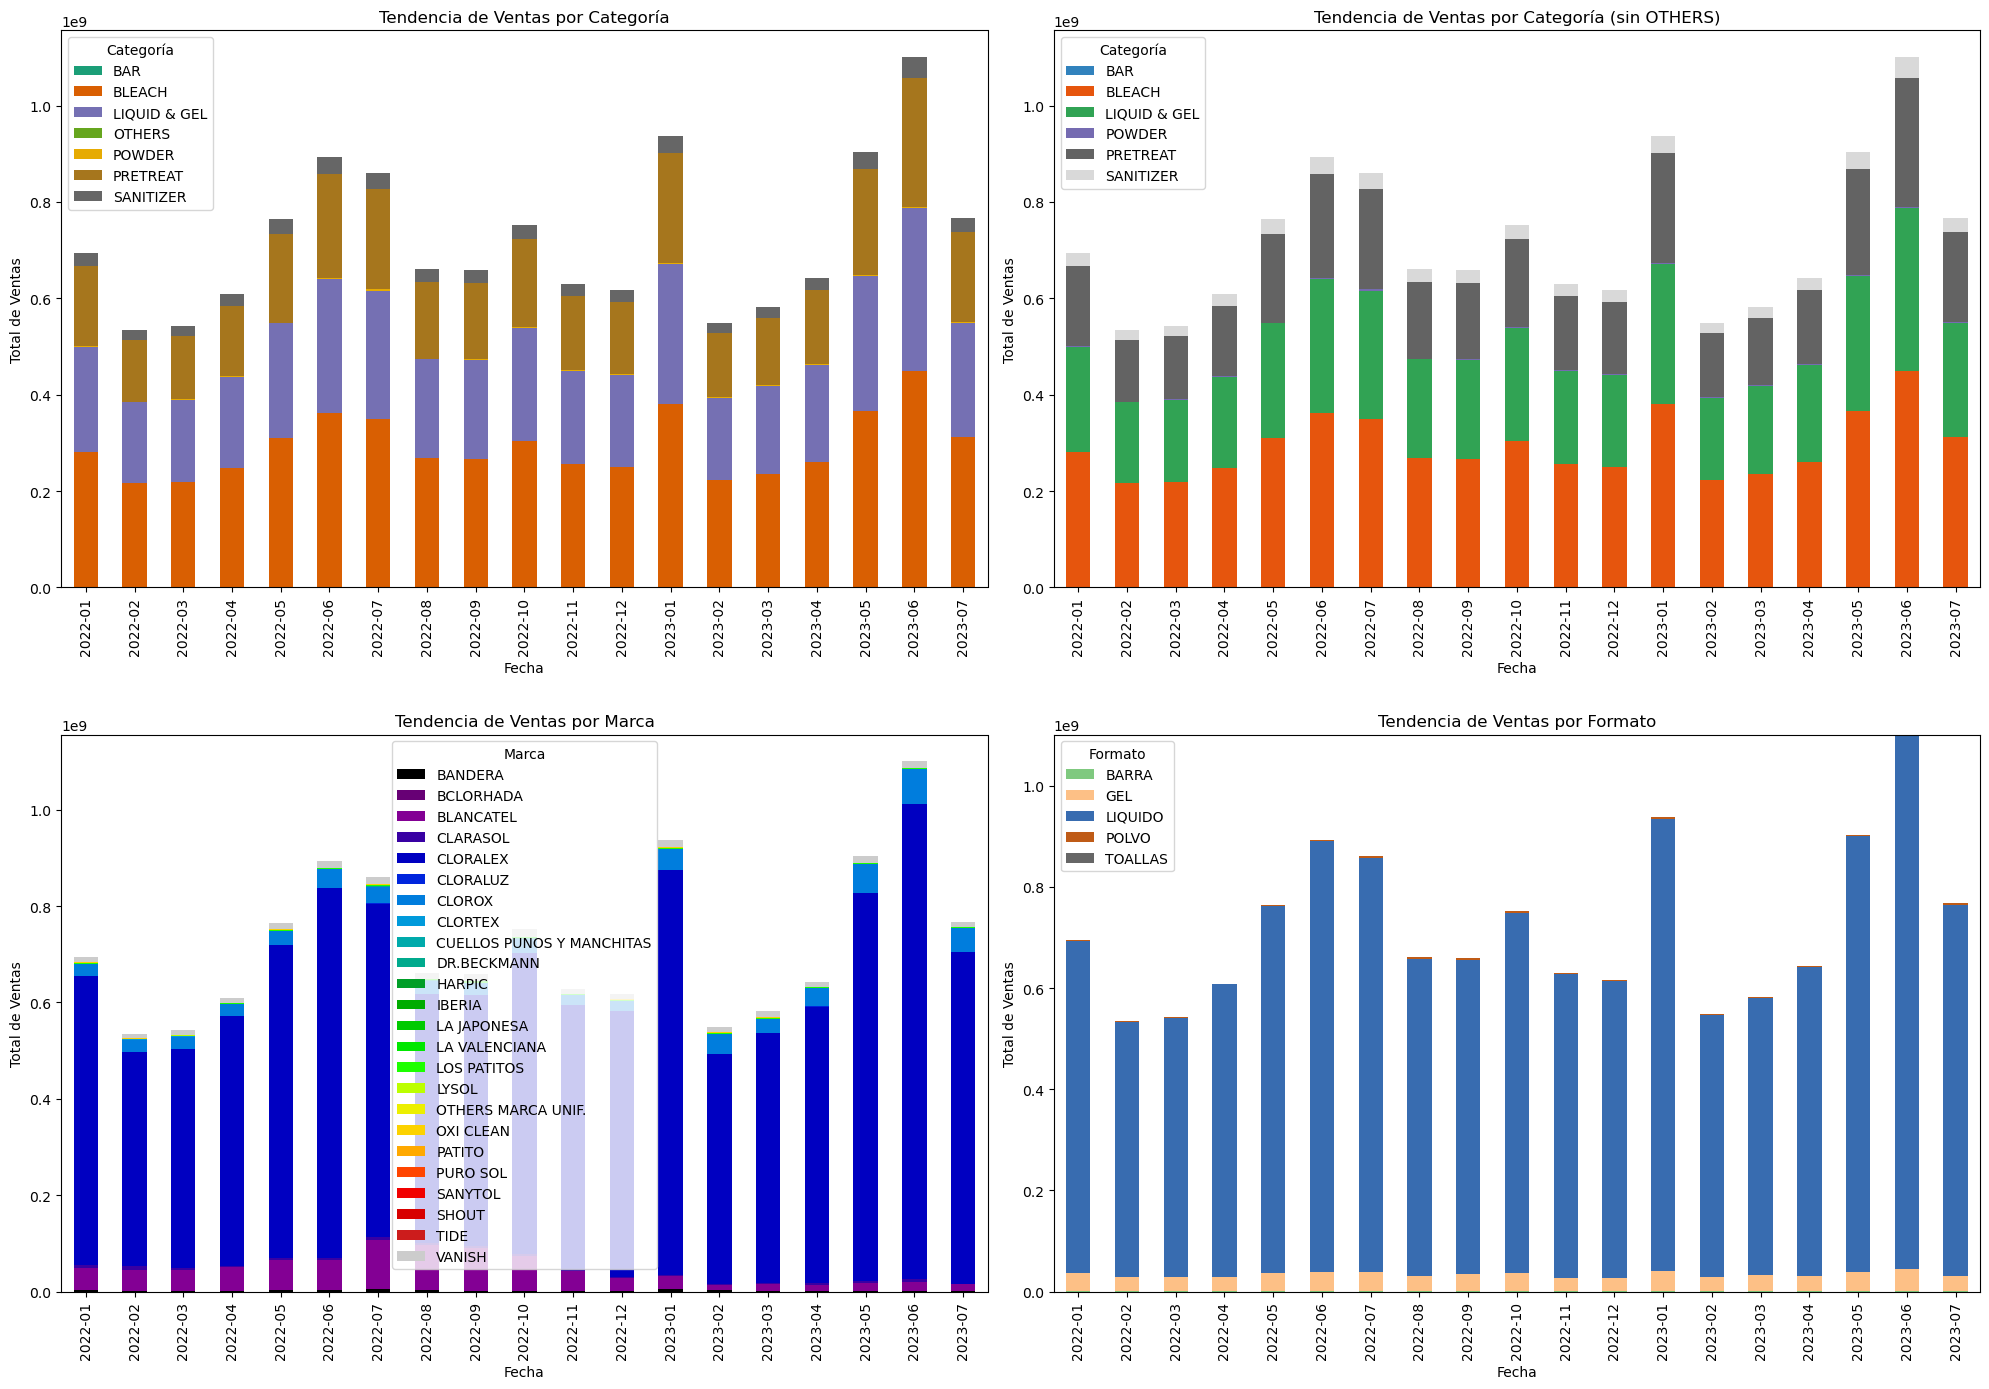

In [11]:
# Creacion de Graficos Compuestos
# Ordenar los datos por fecha
df_merged = df_merged.sort_values(by='DATE')

# Agrupar las fechas por meses
df_merged['DATE'] = pd.to_datetime(df_merged['DATE'])
df_merged['MONTH'] = df_merged['DATE'].dt.to_period('M')

# Crear un conjunto de gráficos compuestos

fig, axs = plt.subplots(2, 2, figsize=(20, 14))

# Tendencia de ventas por categoría
df_category = df_merged.pivot_table(values='TOTAL_SALES', index='MONTH', columns='SEGMENT', aggfunc='sum')
df_category.plot(kind='bar', stacked=True, colormap='Dark2', ax=axs[0, 0])
axs[0, 0].set_title('Tendencia de Ventas por Categoría')
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Total de Ventas')
axs[0, 0].legend(title='Categoría')

# Filtrar los valores "OTHERS" de la columna "SEGMENT"
df_filtered = df_merged[df_merged['SEGMENT'] != 'OTHERS']

# Tendencia de ventas por categoría (sin OTHERS)
df_filtered_category = df_filtered.pivot_table(values='TOTAL_SALES', index='MONTH', columns='SEGMENT', aggfunc='sum')
df_filtered_category.plot(kind='bar', stacked=True, colormap='tab20c', ax=axs[0, 1])
axs[0, 1].set_title('Tendencia de Ventas por Categoría (sin OTHERS)')
axs[0, 1].set_xlabel('Fecha')
axs[0, 1].set_ylabel('Total de Ventas')
axs[0, 1].legend(title='Categoría')

# Tendencia de ventas por marca
df_brand = df_merged.pivot_table(values='TOTAL_SALES', index='MONTH', columns='BRAND', aggfunc='sum')
df_brand.plot(kind='bar', stacked=True, colormap='nipy_spectral', ax=axs[1, 0])
axs[1, 0].set_title('Tendencia de Ventas por Marca')
axs[1, 0].set_xlabel('Fecha')
axs[1, 0].set_ylabel('Total de Ventas')
axs[1, 0].legend(title='Marca')

# Tendencia de ventas por formato
df_format = df_merged.pivot_table(values='TOTAL_SALES', index='MONTH', columns='FORMAT', aggfunc='sum')
df_format.plot(kind='bar', stacked=True, colormap='Accent', ax=axs[1, 1])
axs[1, 1].set_title('Tendencia de Ventas por Formato')
axs[1, 1].set_xlabel('Fecha')
axs[1, 1].set_ylabel('Total de Ventas')
axs[1, 1].legend(title='Formato')

plt.tight_layout()
plt.savefig("Tendencia_ventas_compuesto.png")
plt.show()

#### Paso 5 Visualizar la distribución geográfica de las ventas
Si es posible, utiliza mapas o gráficos de barras apiladas para visualizar las ventas por región. Esto puede ayudar a identificar qué regiones tienen el mayor o menor rendimiento.

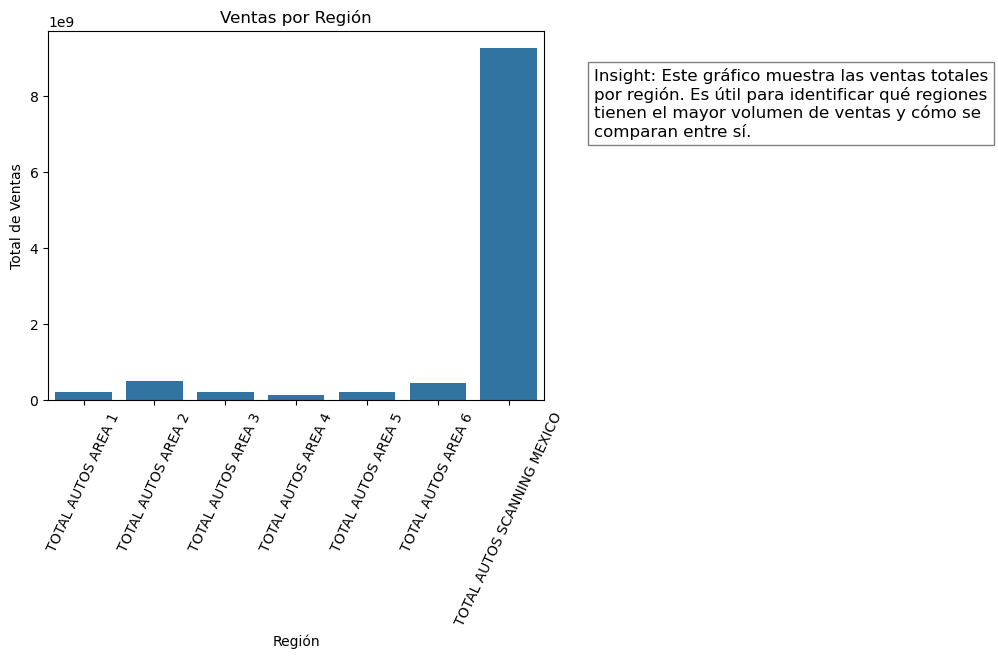

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Función para dividir el texto en líneas más cortas
def wrap_text(text, width):
    return "\n".join(textwrap.wrap(text, width))

# Gráfico de barras apiladas por región
df_region_sales = df_merged.groupby('REGION')['TOTAL_SALES'].sum().reset_index()

# Crear el gráfico de barras
ax = sns.barplot(x='REGION', y='TOTAL_SALES', data=df_region_sales)

# Ajustar el título y las etiquetas
plt.title('Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Total de Ventas')

# Rotar las etiquetas del eje x
plt.xticks(rotation=65)

# Agregar el insight al gráfico
insight_text = wrap_text('Insight: Este gráfico muestra las ventas totales por región. Es útil para identificar qué regiones tienen el mayor volumen de ventas y cómo se comparan entre sí.', 50)
plt.text(1.1, 0.9, insight_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Mostrar el gráfico
plt.savefig("Barplot_ventas_regioninsighttext.png")
plt.show()

In [39]:
# Generar etiquetas aleatorias para cada "REGION" dividido en estados de la republica mexicana aleatoriamente por "REGION_STATES"
import random
# Definir los estados correspondientes de manera aleatoria a cada "REGION" 
noroeste = ["Baja California", "Baja California Sur", "Sonora", "Sinaloa", "Nayarit"]
noreste = ["Chihuahua", "Coahuila", "Nuevo Leon", "Tamaulipas"]
occidente = ["Jalisco", "Colima", "Michoacán", "Guanajuato"]
centro_norte = ["Zacatecas", "Aguascalientes", "San Luis Potosi", "Querétaro"]
centro_sur = ["Ciudad de México", "Estado de México", "Morelos", "Hidalgo", "Tlaxcala"]
este = ["Veracruz", "Puebla"]
sureste = ["Guerrero", "Oaxaca", "Chiapas", "Tabasco", "Campeche", "Yucatán", "Quintana Roo"]
# Crear la nueva columna "REGION_STATES" con valores aleatorios para cada región
df_merged['REGION_STATES'] = df_merged['REGION'].apply(lambda x: random.choice(noroeste) if x == "TOTAL AUTOS AREA 5" else (
    random.choice(noreste) if x == "TOTAL AUTOS AREA 2" else (
        random.choice(occidente) if x == "TOTAL AUTOS AREA 1" else (
            random.choice(centro_norte) if x == "TOTAL AUTOS AREA 3" else (
                random.choice(centro_sur) if x == "TOTAL AUTOS SCANNING MEXICO" else (
                    random.choice(este) if x == "TOTAL AUTOS AREA 4" else (
                        random.choice(sureste) if x == "TOTAL AUTOS AREA 6" else x)))))))
# Crear un diccionario para mapear los estados a sus respectivas regiones
region_mapping = {
    "Baja California": "Noroeste",
    "Baja California Sur": "Noroeste",
    "Sonora": "Noroeste",
    "Sinaloa": "Noroeste",
    "Nayarit": "Noroeste",
    "Chihuahua": "Noreste",
    "Coahuila": "Noreste",
    "Nuevo León": "Noreste",
    "Tamaulipas": "Noreste",
    "Jalisco": "Occidente",
    "Colima": "Occidente",
    "Michoacán": "Occidente",
    "Guanajuato": "Occidente",
    "Zacatecas": "Centro-Norte",
    "Aguascalientes": "Centro-Norte",
    "San Luis Potosí": "Centro-Norte",
    "Querétaro": "Centro-Norte",
    "Ciudad de México": "Centro-Sur",
    "Estado de México": "Centro-Sur",
    "Morelos": "Centro-Sur",
    "Hidalgo": "Centro-Sur",
    "Tlaxcala": "Centro-Sur",
    "Veracruz": "Este",
    "Puebla": "Este",
    "Guerrero": "Sureste",
    "Oaxaca": "Sureste",
    "Chiapas": "Sureste",
    "Tabasco": "Sureste",
    "Campeche": "Sureste",
    "Yucatán": "Sureste",
    "Quintana Roo": "Sureste"
}

# Crear la nueva columna 'REGION' basada en 'REGION_STATES'
df_merged['REGION_NAME'] = df_merged['REGION_STATES'].map(region_mapping)

# Mostrar los primeros registros con la nueva columna
print(df_merged[['REGION', 'REGION_STATES', 'REGION_NAME']].head())
df_merged.to_csv('df_merged.csv')

                              REGION    REGION_STATES   REGION_NAME
387921   TOTAL AUTOS SCANNING MEXICO         Tlaxcala    Centro-Sur
1634986           TOTAL AUTOS AREA 4           Puebla          Este
1143327           TOTAL AUTOS AREA 3  San Luis Potosi           NaN
1143357           TOTAL AUTOS AREA 3   Aguascalientes  Centro-Norte
1143364           TOTAL AUTOS AREA 3        Querétaro  Centro-Norte


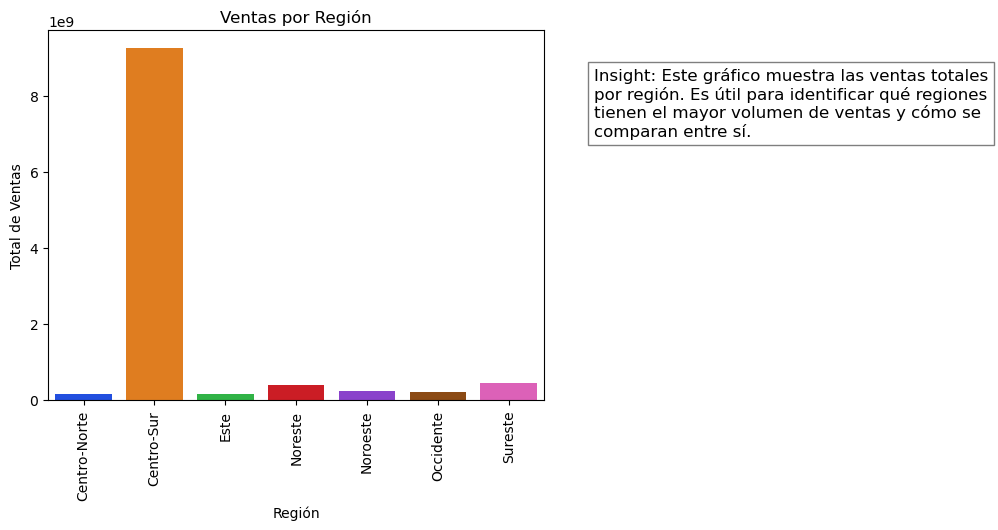

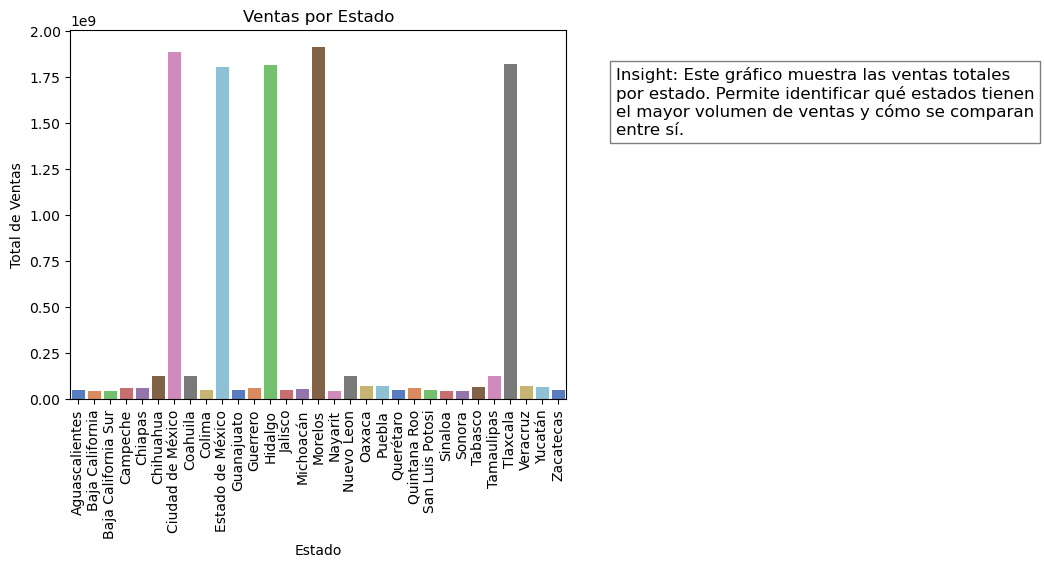

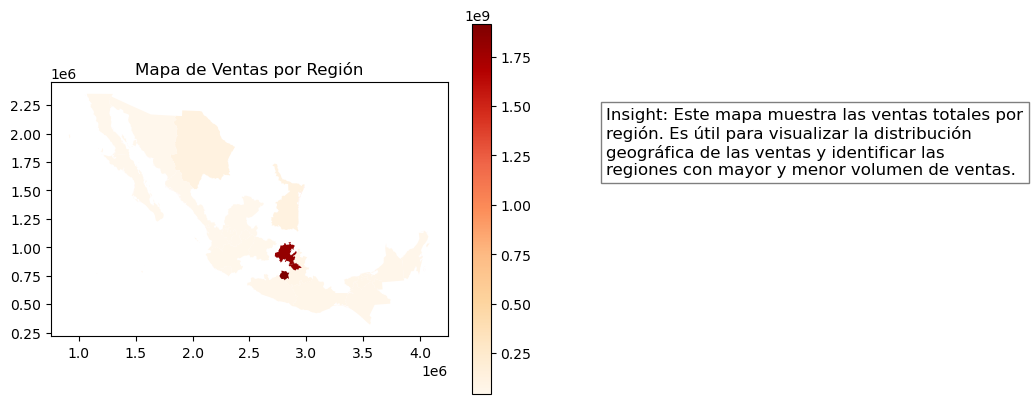

In [47]:
import geopandas as gpd

# Función para dividir el texto en líneas más cortas
def wrap_text(text, width):
    return "\n".join(textwrap.wrap(text, width))

# Gráfico de barras apiladas por región
df_region_sales = df_merged.groupby('REGION_NAME')['TOTAL_SALES'].sum().reset_index()

ax = sns.barplot(x='REGION_NAME', y='TOTAL_SALES', data=df_region_sales, hue='REGION_NAME', palette='bright', legend=False)

# Ajustar el título y las etiquetas
plt.title('Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Total de Ventas')

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)

# Agregar el insight al gráfico
insight_text = wrap_text('Insight: Este gráfico muestra las ventas totales por región. Es útil para identificar qué regiones tienen el mayor volumen de ventas y cómo se comparan entre sí.', 50)
plt.text(1.1, 0.9, insight_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Mostrar el gráfico
plt.savefig("Barplot_ventas_region2_insight.png")
plt.show()

# Gráfico de barras apiladas por Estado
df_region_sales = df_merged.groupby('REGION_STATES')['TOTAL_SALES'].sum().reset_index()

ax = sns.barplot(x='REGION_STATES', y='TOTAL_SALES', data=df_region_sales, hue='REGION_STATES', palette='muted', legend=False)

# Ajustar el título y las etiquetas
plt.title('Ventas por Estado')
plt.xlabel('Estado')
plt.ylabel('Total de Ventas')

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)

# Agregar el insight al gráfico
insight_text = wrap_text('Insight: Este gráfico muestra las ventas totales por estado. Permite identificar qué estados tienen el mayor volumen de ventas y cómo se comparan entre sí.', 50)
plt.text(1.1, 0.9, insight_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Mostrar el gráfico
plt.savefig("Barplot_ventas_region3_insight.png")
plt.show()

# Ejemplo de datos de ventas por región utilizando datos aleatorios de "REGION_STATES"
# Cargar el shapefile de los límites de los estados de México
shapefile_path = r'C:\Users\erojas\Downloads\dest22gw_c\dest22cw.shp'
gdf = gpd.read_file(shapefile_path)

# Suponiendo que df_merged ya está definido y contiene los datos necesarios
df_region_sales = df_merged.groupby('REGION_STATES')['TOTAL_SALES'].sum().reset_index()

# Unir los datos de ventas con el GeoDataFrame
gdf = gdf.merge(df_region_sales, left_on='NOMGEO', right_on='REGION_STATES')

# Crear el mapa
ax = gdf.plot(column='TOTAL_SALES', cmap='OrRd', legend=True)

# Ajustar el título
plt.title('Mapa de Ventas por Región')

# Agregar el insight al gráfico
insight_text = wrap_text('Insight: Este mapa muestra las ventas totales por región. Es útil para visualizar la distribución geográfica de las ventas y identificar las regiones con mayor y menor volumen de ventas.', 50)
plt.text(1.4, 0.9, insight_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Mostrar el mapa
plt.savefig("map_ventas_region_insight.png")
plt.show()

#### Paso 6 Identificar posibles outliers y anomalías:
Utiliza gráficos de caja (boxplots) para identificar posibles outliers en los datos de ventas por producto, categoría o región. Identificar outliers puede ayudar a entender mejor los patrones inusuales o anómalos en los datos.

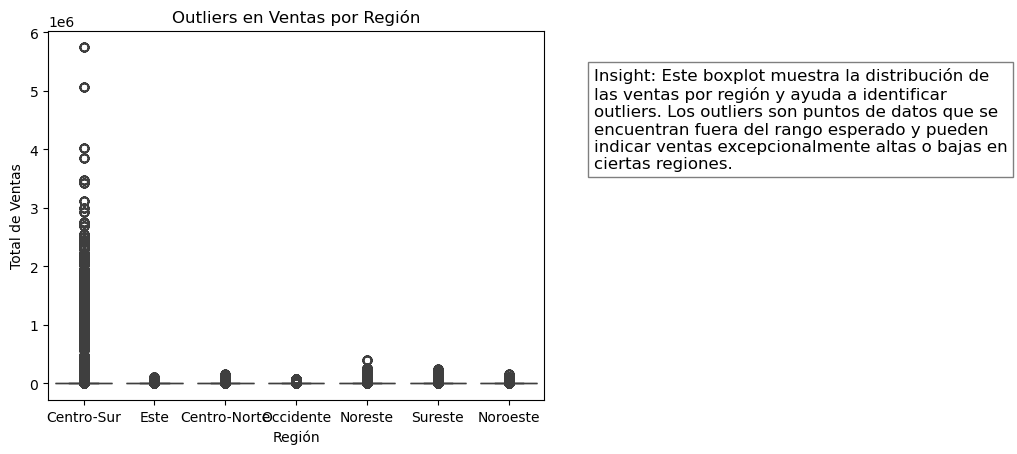

In [51]:
# Función para dividir el texto en líneas más cortas
def wrap_text(text, width):
    return "\n".join(textwrap.wrap(text, width))

# Boxplot para identificar outliers en ventas por región
ax = sns.boxplot(x='REGION_NAME', y='TOTAL_SALES', data=df_merged)
plt.title('Outliers en Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Total de Ventas')

# Agregar el insight al gráfico
insight_text = wrap_text('Insight: Este boxplot muestra la distribución de las ventas por región y ayuda a identificar outliers. Los outliers son puntos de datos que se encuentran fuera del rango esperado y pueden indicar ventas excepcionalmente altas o bajas en ciertas regiones.', 50)
plt.text(1.1, 0.9, insight_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Guardar y mostrar el gráfico
plt.savefig("outliners_ventas_region.png")
plt.show()

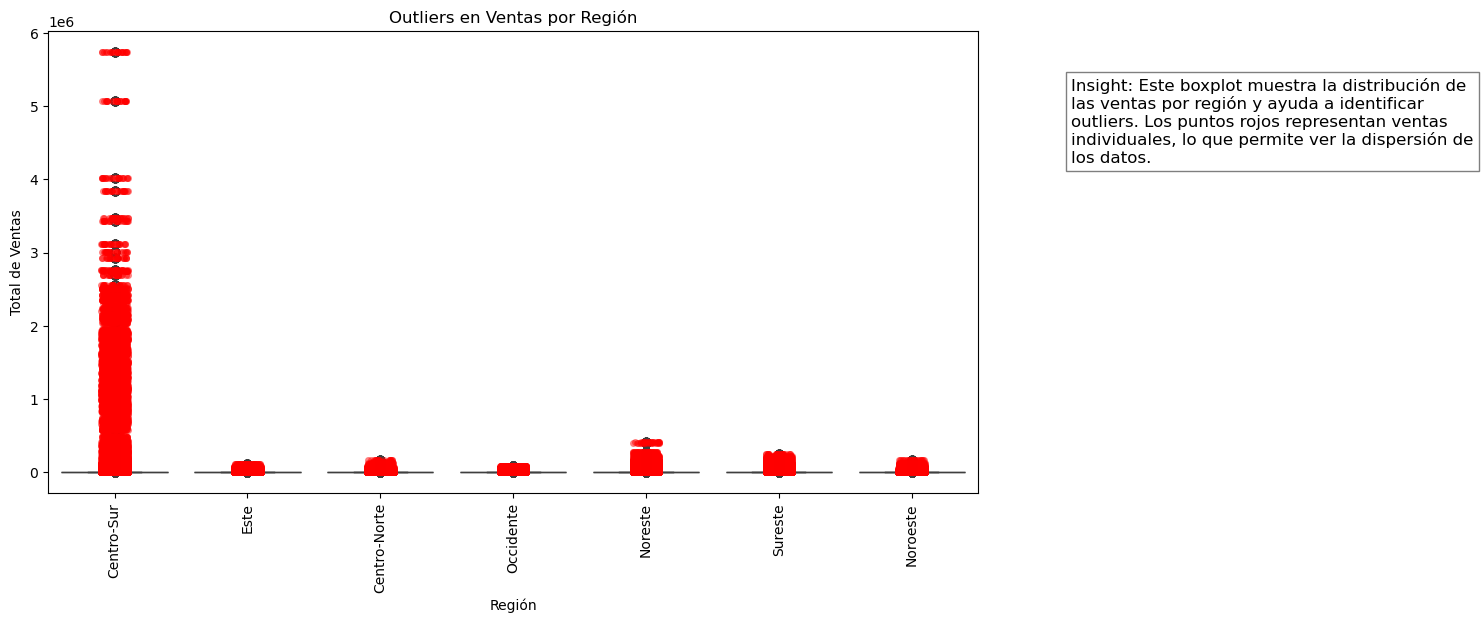

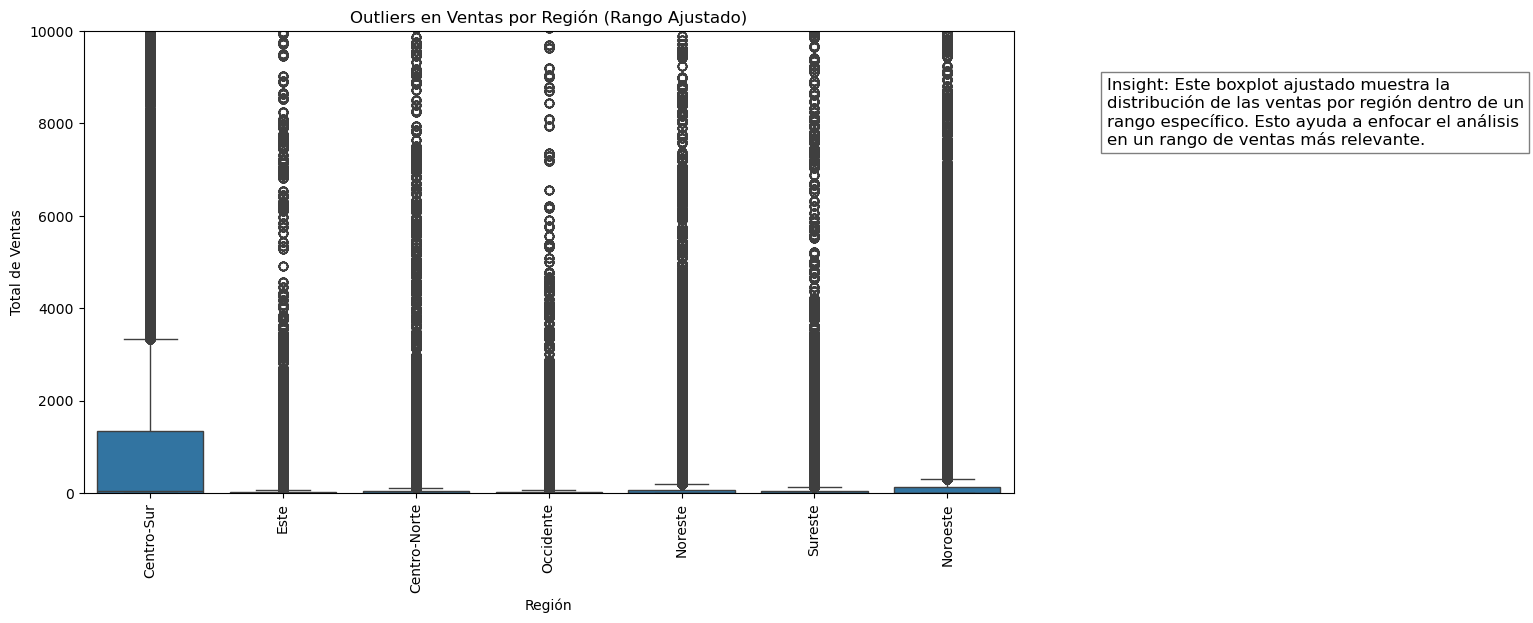

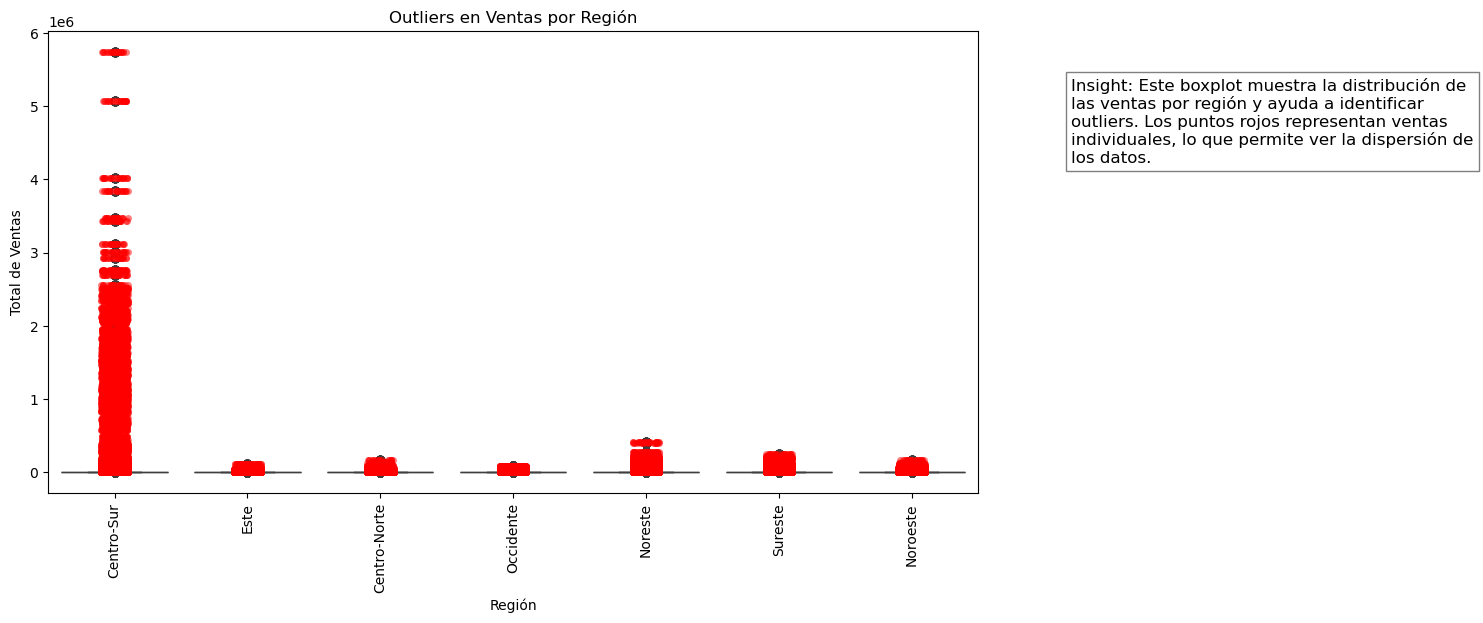

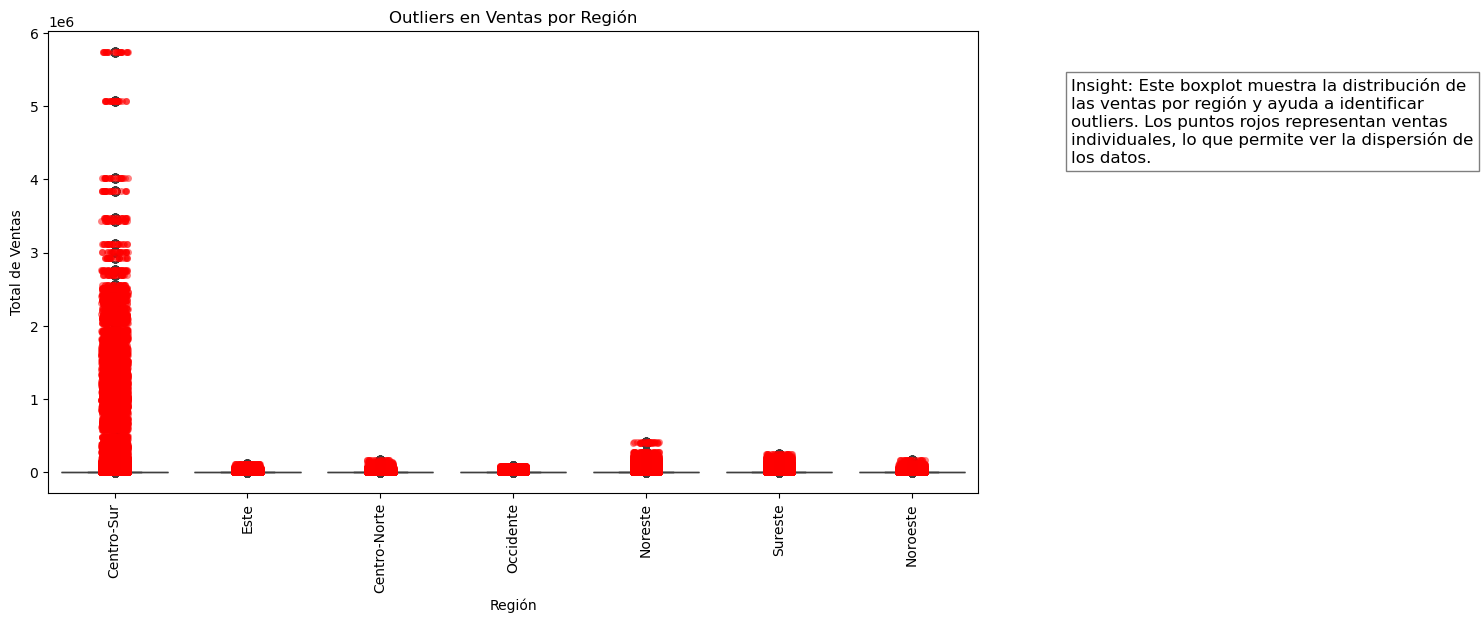

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

# Función para dividir el texto en líneas más cortas
def wrap_text(text, width):
    return "\n".join(textwrap.wrap(text, width))

# Boxplot para identificar outliers en ventas por región con puntos de datos individuales
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='REGION_NAME', y='TOTAL_SALES', data=df_merged)
sns.stripplot(x='REGION_NAME', y='TOTAL_SALES', data=df_merged, color='red', alpha=0.5, jitter=True)
plt.title('Outliers en Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=90)
insight_text = wrap_text('Insight: Este boxplot muestra la distribución de las ventas por región y ayuda a identificar outliers. Los puntos rojos representan ventas individuales, lo que permite ver la dispersión de los datos.', 50)
plt.text(1.1, 0.9, insight_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

# Ajustar el rango del eje y
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='REGION_NAME', y='TOTAL_SALES', data=df_merged)
plt.ylim(0, 10000)  # Ajusta el rango según tus datos
plt.title('Outliers en Ventas por Región (Rango Ajustado)')
plt.xlabel('Región')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=90)
insight_text = wrap_text('Insight: Este boxplot ajustado muestra la distribución de las ventas por región dentro de un rango específico. Esto ayuda a enfocar el análisis en un rango de ventas más relevante.', 50)
plt.text(1.1, 0.9, insight_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.savefig("outliners_ventas_region2_insight.png")
plt.show()

# Boxplot para identificar outliers en ventas por producto con puntos de datos individuales
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='REGION_NAME', y='TOTAL_SALES', data=df_merged)
sns.stripplot(x='REGION_NAME', y='TOTAL_SALES', data=df_merged, color='red', alpha=0.5, jitter=True)
plt.title('Outliers en Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=90)
insight_text = wrap_text('Insight: Este boxplot muestra la distribución de las ventas por región y ayuda a identificar outliers. Los puntos rojos representan ventas individuales, lo que permite ver la dispersión de los datos.', 50)
plt.text(1.1, 0.9, insight_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.savefig("outliners_ventas_region3_insight.png")
plt.show()

# Boxplot para identificar outliers en ventas por producto con puntos de datos individuales
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='REGION_NAME', y='TOTAL_SALES', data=df_merged)
sns.stripplot(x='REGION_NAME', y='TOTAL_SALES', data=df_merged, color='red', alpha=0.5, jitter=True)
plt.title('Outliers en Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=90)
insight_text = wrap_text('Insight: Este boxplot muestra la distribución de las ventas por región y ayuda a identificar outliers. Los puntos rojos representan ventas individuales, lo que permite ver la dispersión de los datos.', 50)
plt.text(1.1, 0.9, insight_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.savefig("outliners_ventas_region4_insight.png")
plt.show()

#### Paso 7 Documentar los insights obtenidos:
Anota los principales hallazgos que observes en cada visualización. Por ejemplo, si ciertas categorías tienen un desempeño consistentemente alto o si ciertas regiones muestran un crecimiento o declive inesperado en las ventas.

In [ ]:
# Se agregaron cajas de texto en el codigo

#### Paso 8 Guardar las visualizaciones:
Guarda todas las visualizaciones generadas en archivos gráficos (PNG, JPEG) para usarlos posteriormente en el dashboard o en la presentación final.

In [ ]:
# Las Visualizaciones fueron guardadas con diferentes nombres antes de mostrar el grafico en cada uno de los codigos de cada grafico
# Ejemplo: (plt.savefig("outliners_ventas_region4_insight.png"))

#### Notas:


##### se tomaron en cuenta las siguientes recomendaciones del entregable 1:

1. Optimización del rendimiento:
• Considera el uso de la opción dtype al cargar los archivos para reducir el uso de memoria.


2. Visualización exploratoria:
Agregar gráficos de distribución de datos usando matplotlib o seaborn podría mejorar la comprensión inicial del conjunto de datos.

3. Gestión de valores nulos:
Aunque se aplicó fillna(), podrías evaluar métodos más avanzados como imputación basada en modelos o análisis de patrones de datos faltantes.

##### Las siguientes recomendaciones del entregable 1 NO supe como usarlas:

1. Estandarización adicional:
Implementar validaciones automáticas para detectar valores atípicos o inconsistencias después de la limpieza.

2. Utilizar chunksize al leer archivos de gran tamaño.